# Inverse theory: assessed coursework
**Due Tuesday November 12th, 2pm. Turnitin submission folder in "Assessment and Feedback -> Submit my work" on Minerva.**

**Read these instructions through to the end**

The temperature of a lake is changing with time. The temperature of the water, in C, is given by the following data with their measurement uncertainty (i.e. the standard deviation of the measurements estimated from the instrumentation error).

Text(0.5, 1.0, 'Temperature variation with time')

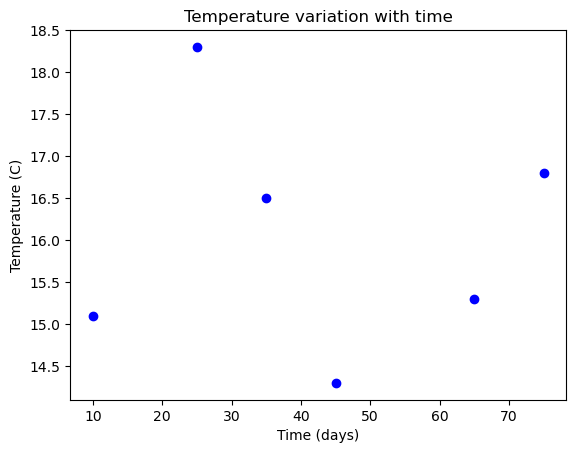

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = np.array([15.1, 18.3, 16.5, 14.3,15.3,16.8 ])   #temperature
sd = np.array([0.4, 0.3, 0.5, 0.3, 0.2, 0.2])  #data uncertainty
times = np.array([10,25,35,45,65,75])  #time in days

plt.figure()
plt.plot(times,d,'o',color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Temperature (C)')
plt.title('Temperature variation with time')

The following nonlinear model is proposed:
$$ y = A sin(kt) + B cos(kt) + C$$

where $y$ is temperature, $A,B, C$ and $k$ are unknown constants, and $t$ is time in days.

1. Using the method presented in the lectures, find the best model fit to the given data using nonlinear least squares, assuming that the data are weighted according to their uncertainties: this is the nonlinear analogue of the BLUE. Use the initial guess $[1,2,0.1,10]$ for the model vector $[A,B,k,C]$. You can use the Python code supplied below, but note you need to define Qdd, and the functions g and g_derivatives for it to run.

You should display to the screen two columns of numbers: (i) the number of iterations N and (ii) your model estimate using N iterations, for N up to 20.
How many iterations do you need to get convergence to 6 decimal places in all of the model components?  **[6]**

2. Display your converged model (which is a smooth function of time) along with the data on the same figure. **[1]**

3. Calculate the weighted sum of the squares associated with your model. **[1]**

4. Now calculate the uncertainty (i.e. the standard deviation) of model parameter $k$. Use a bootstrap procedure with 1000 realisations and a seed of 10 for the random number generator (see example code below). Each datum can be assumed normally distributed with a mean of its measured value and the given standard deviation. Each realisation should use the initial model guess $[1,2,0.1,10]$. Display the uncertainty to the screen, along with the associated histogram of the 1000 $k$ parameters. **[4]**
 
5. Your nonlinear least-squares estimate should lie at a minimum in model space. Confirm that this is so for model parameter k, by plotting the weighted residual sum of the squares against different values of k over a suitable range, assuming that your other parameter values are given by your model from part (1). Highlight your optimal value of k to show that it lies at a local minimum. **[3]**

6. Investigate the least-squares fitting of part (1) as a function of initial model guess.
Instead of using the guess [1,2,0.1,10], again setting the random seed to 10 at the start of your code for this question part, now generate 100 random models according to:

    initial_model = np.array([ random.normalvariate(0,4), random.normalvariate(0,4), random.normalvariate(0,4), random.normalvariate(0,4) ])

Assuming that all your calculations are converged within 20 iterations, you will create 100 models that might differ.  
From your 100 models find the model with the lowest weighted sum of the squares.
Plot the smooth forward model over time, comparing against not only the data but also your model from part (2). Comment on how the  value of k you find relates to the uncertainty from part 4.  Of the two values of k you have found: from part (1) and (6), which do you think is more defensible?   **[3]**

7. Include comments throughout your notebook to describe your workflow.  **[2]**

You may find it helpful to use the outline Python code below.
Total number of marks available: 20

**Note that you have access to all of the Python notebooks for the practicals so far - I do not expect you to produce code for this assessment from scratch.  You should include both markdown and Python code cells in your notebook.**



#### Submit your work as a Jupyter notebook, saved as a pdf. 

To save it, 
1. Restart Noteable, selecting "shut down" existing server if needed.
2. Select "Jupyter Classic (Legacy)" rather than a "Geoscience" server
3. Open your notebook. Go to File -> Download as ->  PDF via LaTex.
4. A pdf version of your notebook should download, which you can then upload into Minerva.
5. If you encounter LaTex errors on saving, check your LaTex and the cell-types (markdown/code/etc) carefully.
  
6. Note that the functionality to directly export a pdf version from the "Geoscience" server does not currently work. This is why you need to restart it in the legacy mode. 

# Answers

## Q1
1. Using the method presented in the lectures, find the best model fit to the given data using nonlinear least squares, assuming that the data are weighted according to their uncertainties: this is the nonlinear analogue of the BLUE. Use the initial guess $[1,2,0.1,10]$ for the model vector $[A,B,k,C]$. You can use the Python code supplied below, but note you need to define Qdd, and the functions g and g_derivatives for it to run.

You should display to the screen two columns of numbers: (i) the number of iterations N and (ii) your model estimate using N iterations, for N up to 20.
How many iterations do you need to get convergence to 6 decimal places in all of the model components?  **[6]**

**Reminder**

$$ y = A sin(kt) + B cos(kt) + C$$
$$m = [A,B,k,C]$$
$$times = [10,25,35,45,65,75]$$
$$d = [15.1, 18.3, 16.5, 14.3,15.3,16.8 ]$$

**Temperatures Matrix**

$d[i] = m[0]sin(m[2]times[i]) + m[1]cos(m[2]times[i]) + m[3]$

$i = 0,1,2,3,4,5$

$d[0] =  m[0]sin(m[2]times[0]) + m[1] cos(m[2]times[0]) + m[3] = 15.1$

$d[1] =  m[0]sin(m[2]times[1]) + m[1] cos(m[2]times[1]) + m[3] = 18.3$

$d[2] =  m[0]sin(m[2]times[2]) + m[1] cos(m[2]times[2]) + m[3] = 16.5$

$d[3] =  m[0]sin(m[2]times[3]) + m[1] cos(m[2]times[3]) + m[3] = 14.3$

$d[4] =  m[0]sin(m[2]times[4]) + m[1] cos(m[2]times[4]) + m[3] = 15.3$

$d[5] =  m[0]sin(m[2]times[5]) + m[1] cos(m[2]times[5]) + m[3] = 16.8$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Here are the data supplied in the question as vectors
d = np.array([15.1, 18.3, 16.5, 14.3,15.3,16.8 ])   #temperature
sd = np.array([0.4, 0.3, 0.5, 0.3, 0.2, 0.2])  #data uncertainty
times = np.array([10,25,35,45,65,75])  #time in days

In [4]:
m_0 = np.array([1,2,0.1,10]) # initial guess

In [5]:
def g_calculate(m):
    """Function that calculates g for given model m"""
    g = np.zeros(6)
    g[0] = m[0] * np.sin(m[2] * times[0]) + m[1] * np.cos(m[2] * times[0]) + m[3]
    g[1] = m[0] * np.sin(m[2] * times[1]) + m[1] * np.cos(m[2] * times[1]) + m[3]
    g[2] = m[0] * np.sin(m[2] * times[2]) + m[1] * np.cos(m[2] * times[2]) + m[3]
    g[3] = m[0] * np.sin(m[2] * times[3]) + m[1] * np.cos(m[2] * times[3]) + m[3]
    g[4] = m[0] * np.sin(m[2] * times[4]) + m[1] * np.cos(m[2] * times[4]) + m[3]
    g[5] = m[0] * np.sin(m[2] * times[5]) + m[1] * np.cos(m[2] * times[5]) + m[3]
    return g

**Taylor Expanison Matrix**

Column 0 is the partial derivative of g with respect to $A = sin(kt)$

$A[i,0] = sin(m[2]times[i])$

Column 1 is the partial derivative of g with respect to $B = cos(kt)$

$A[i,1] = cos(m[2]times[i])$

Column 2 is the partial derivative of g with respect to $k = tAcos(kt) - tBsin(kt)$

$A[i,2] = (times[i]m[0])*cos(m[2]times[i]) - (times[i]m[1])*sin(m[2]times[i])$

Column 3 is the partial derivative of g with respect to $C = 1$

$A[i,3] = 1$

$i = 0,1,2,3,4,5$

In [6]:
def g_derivatives(m):
    """Calculate the matrix of derivatives of g"""
    A = np.zeros((6,4))
    
    # column 0 is the derivative of g with respect to model variable with index 0 (A)
    
    A[0,0] = np.sin(m[2] * times[0])
    A[1,0] = np.sin(m[2] * times[1])
    A[2,0] = np.sin(m[2] * times[2])
    A[3,0] = np.sin(m[2] * times[3])
    A[4,0] = np.sin(m[2] * times[4])
    A[5,0] = np.sin(m[2] * times[5])

    # column 1 is the derivative of g with respect to model variable with index 1 (B)
    
    A[0,1] = np.cos(m[2] * times[0])
    A[1,1] = np.cos(m[2] * times[1])
    A[2,1] = np.cos(m[2] * times[2])
    A[3,1] = np.cos(m[2] * times[3])
    A[4,1] = np.cos(m[2] * times[4])
    A[5,1] = np.cos(m[2] * times[5])

    # column 2 is the derivative of g with respect to model variable with index 2 (k)
    
    A[0,2] = (times[0] * m[0]) * np.cos(m[2] * times[0]) - (times[0] * m[1]) * np.sin(m[2] * times[0])
    A[1,2] = (times[1] * m[0]) * np.cos(m[2] * times[1]) - (times[1] * m[1]) * np.sin(m[2] * times[1])
    A[2,2] = (times[2] * m[0]) * np.cos(m[2] * times[2]) - (times[2] * m[1]) * np.sin(m[2] * times[2])
    A[3,2] = (times[3] * m[0]) * np.cos(m[2] * times[3]) - (times[3] * m[1]) * np.sin(m[2] * times[3])
    A[4,2] = (times[4] * m[0]) * np.cos(m[2] * times[4]) - (times[4] * m[1]) * np.sin(m[2] * times[4])
    A[5,2] = (times[5] * m[0]) * np.cos(m[2] * times[5]) - (times[5] * m[1]) * np.sin(m[2] * times[5])

    # column 3 is the derivative of g with respect to model variable with index 3 (C)

    A[0,3] = 1
    A[1,3] = 1
    A[2,3] = 1
    A[3,3] = 1
    A[4,3] = 1
    A[5,3] = 1

    return A


**Defining $Q_{dd}$**

In [7]:
Qdd = np.diag(sd**2)

**Estimating the model using non-linear BLUE**

In [8]:
def calc_nonlinear_solution (initial_model, N, dvec):
    ''' Calculates nonlinear least squares solution using a linearisation over N iterations, assuming an initial model and a data vector dvec.
    The function assumes that Qdd, and the functions g_calculate and g_derivatives are defined. 
    
    From an initial model, the function iterates N times:
        delta_m = (A^T Qdd^{-1} A)^{-1} A^T Qdd^{-1} (dvec - g(m))
        m += delta_m
    '''
    Qddinv = np.linalg.inv(Qdd)
    current_model = initial_model
    for i in range(N):
        delta_d = dvec - g_calculate(current_model) 
        A = g_derivatives(current_model)
        delta_m = np.linalg.inv( A.T @ Qddinv @ A) @ A.T @ Qddinv @ delta_d
        current_model += delta_m
        print('iteration', i+1,'model estimate:', current_model)
    return current_model

In [9]:
initial_model = np.array([1,2,0.1,10])
estimated_model = calc_nonlinear_solution(initial_model,20,d)

iteration 1 model estimate: [ 1.60015885 -1.3063261   0.10060286 15.86772156]
iteration 2 model estimate: [ 0.74909021 -2.22200998  0.11142717 15.66398494]
iteration 3 model estimate: [ 0.67799415 -1.91915511  0.11113079 15.6550929 ]
iteration 4 model estimate: [ 0.67501461 -1.92021473  0.11108766 15.6562984 ]
iteration 5 model estimate: [ 0.67819884 -1.91941373  0.111052   15.65694791]
iteration 6 model estimate: [ 0.6779781  -1.91951959  0.11105094 15.65710829]
iteration 7 model estimate: [ 0.678136   -1.91947743  0.11104926 15.65713484]
iteration 8 model estimate: [ 0.67812107 -1.91948375  0.11104926 15.65714174]
iteration 9 model estimate: [ 0.67812903 -1.91948156  0.11104918 15.65714282]
iteration 10 model estimate: [ 0.67812809 -1.91948192  0.11104918 15.65714312]
iteration 11 model estimate: [ 0.6781285  -1.9194818   0.11104918 15.65714316]
iteration 12 model estimate: [ 0.67812844 -1.91948182  0.11104918 15.65714318]
iteration 13 model estimate: [ 0.67812847 -1.91948182  0.1110

In [10]:
print('My estimated model after 20 iterations is: ',estimated_model)
print('Therefore A =', estimated_model[0],'B =', estimated_model[1], 'k =', estimated_model[2], 'C =',estimated_model[3])

My estimated model after 20 iterations is:  [ 0.67812846 -1.91948182  0.11104918 15.65714318]
Therefore A = 0.6781284634787764 B = -1.919481818614574 k = 0.1110491786758255 C = 15.657143178237995


**Model is converged after 10 iterations**

## Q2
2. Display your converged model (which is a smooth function of time) along with the data on the same figure. **[1]**

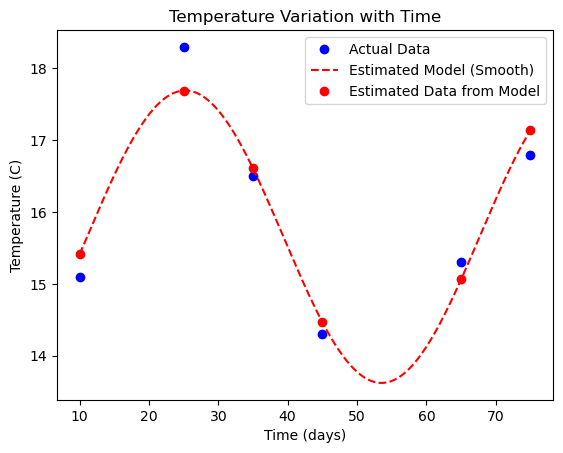

In [11]:
y = estimated_model[0] * np.sin(estimated_model[2] * times) + estimated_model[1] * np.cos(estimated_model[2] * times) + estimated_model[3]

time_smooth = np.linspace(times.min(), times.max(), 200)  # Creating a range of times to create a smoother curve
y_smooth = estimated_model[0] * np.sin(estimated_model[2] * time_smooth) + estimated_model[1] * np.cos(estimated_model[2] * time_smooth) + estimated_model[3]

plt.figure()
plt.plot(times, d, 'o', color='blue', label='Actual Data') 
plt.plot(time_smooth, y_smooth, color='red', linestyle='--', label='Estimated Model (Smooth)')
plt.plot(times, y, 'o', color='red', label='Estimated Data from Model')  
plt.xlabel('Time (days)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Variation with Time')

plt.legend()
plt.show()


## Q3
3. Calculate the weighted sum of the squares associated with your model. **[1]**

The weighted sum of squares \( S \) is given by:


$$S = \sum_{i=1}^{n} \left( \frac{d_i - y_i}{sd_i} \right)^2$$

where:
- $d_i$ represents the actual data points,
- $y_i$ represents the calculated (model-predicted) data points,
- $sd_i$ represents the standard deviations (uncertainties) associated with each data point $d_i$,
- $n$ is the number of data points.


In [12]:
weighted_sum_of_squares = np.sum(((d - y) / sd) ** 2)
print('The weighted sum of squares associated with my model is: ', weighted_sum_of_squares)

The weighted sum of squares associated with my model is:  9.324230905909193


## Q4
4. Now calculate the uncertainty (i.e. the standard deviation) of model parameter $k$. Use a bootstrap procedure with 1000 realisations and a seed of 10 for the random number generator (see example code below). Each datum can be assumed normally distributed with a mean of its measured value and the given standard deviation. Each realisation should use the initial model guess $[1,2,0.1,10]$. Display the uncertainty to the screen, along with the associated histogram of the 1000 $k$ parameters. **[4]**

**Copying calc_nonlinear_solution() function without the line that prints the iteration and the corresponding model**

In [13]:
def calc_nonlinear_solution (initial_model, N, dvec):
    ''' Calculates nonlinear least squares solution using a linearisation over N iterations, assuming an initial model and a data vector dvec.
    The function assumes that Qdd, and the functions g_calculate and g_derivatives are defined. 
    
    From an initial model, the function iterates N times:
        delta_m = (A^T Qdd^{-1} A)^{-1} A^T Qdd^{-1} (dvec - g(m))
        m += delta_m
    '''
    Qddinv = np.linalg.inv(Qdd)
    current_model = initial_model
    for i in range(N):
        delta_d = dvec - g_calculate(current_model)
        A = g_derivatives(current_model)
        delta_m = np.linalg.inv( A.T @ Qddinv @ A) @ A.T @ Qddinv @ delta_d
        current_model += delta_m
    return current_model

**Qmm quantifies the squared uncertainty of the estimated model parameters, so the square root of the values on the diagonal should match the standard deviations of each model parameter**

In [14]:
initial_model = np.array([1,2,0.1,10])
A = g_derivatives(initial_model)
Qdd = np.diag(sd**2)
Qddinv = np.linalg.inv(Qdd)
Qmm = np.linalg.inv(A.T @ Qddinv @ A)
k_uncertainty = np.sqrt(Qmm[2,2])
print('The uncertainty of model parameter k is: ',k_uncertainty)

The uncertainty of model parameter k is:  0.003664238413932202


In [15]:
d = np.array([15.1, 18.3, 16.5, 14.3,15.3,16.8 ])
sd = np.array([0.4, 0.3, 0.5, 0.3, 0.2, 0.2])

**Bootstrapping Procedure**

In [16]:
import random
random.seed(10)
Number_of_models = 1000
initial_model = np.array([1,2,0.1,10])
models_from_bootstrapping = np.zeros((Number_of_models,4))
for i in range(Number_of_models):
    d_new = np.zeros(len(times))
    for j in range(len(times)):
        d_new[j] = random.normalvariate(d[j],sd[j]) # creating random data vectors with the mean and standard deviation of the actual data
    models_from_bootstrapping[i,:] = calc_nonlinear_solution(initial_model,20,d_new) # calculating models using the random data vectors

**Plotting**

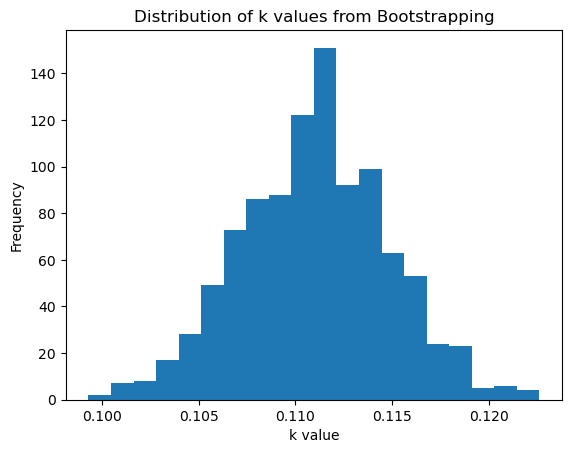

In [17]:
plt.hist(models_from_bootstrapping[:, 2], bins=20)
plt.xlabel('k value')       
plt.ylabel('Frequency')      
plt.title('Distribution of k values from Bootstrapping')
plt.show()

In [18]:
k_uncertainty = np.std(models_from_bootstrapping[:,2])
print('The uncertainty of k, using the bootstrapping procedure is: ', k_uncertainty )

The uncertainty of k, using the bootstrapping procedure is:  0.0038127083152022572


## Q5
5. Your nonlinear least-squares estimate should lie at a minimum in model space. Confirm that this is so for model parameter k, by plotting the weighted residual sum of the squares against different values of k over a suitable range, assuming that your other parameter values are given by your model from part (1). Highlight your optimal value of k to show that it lies at a local minimum. **[3]**

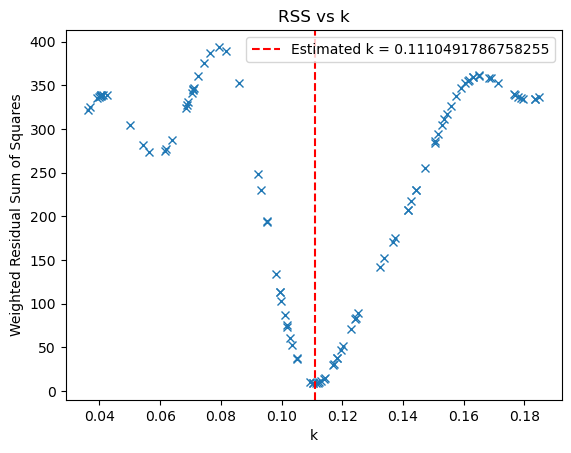

In [19]:
k = estimated_model[2]
N = 100
random.seed(1)
rss = np.zeros(N)
k_values = np.zeros(N)

for i in range(N):
    k_values[i] = random.uniform(k - 0.075, k + 0.075) # defining the range for random k values
    # using the random k_values and the estimated model values to calculate temperatures
    y = estimated_model[0] * np.sin(k_values[i] * times) + estimated_model[1] * np.cos(k_values[i] * times) + estimated_model[3]
    residuals = (d - y)/sd # difference between actual temperatures and calculated temperatuees
    rss[i] = np.sum(  (residuals)**2 ) 

# Potting
plt.plot(k_values, rss,'x')
plt.axvline(x=k, color="red", linestyle="--", label=f"Estimated k = {k}")
plt.xlabel("k")
plt.ylabel("Weighted Residual Sum of Squares")
plt.title("RSS vs k")
plt.legend()
plt.show()

## Q6
6. Investigate the least-squares fitting of part (1) as a function of initial model guess.
Instead of using the guess [1,2,0.1,10], again setting the random seed to 10 at the start of your code for this question part, now generate 100 random models according to:

    initial_model = np.array([ random.normalvariate(0,4), random.normalvariate(0,4), random.normalvariate(0,4), random.normalvariate(0,4) ])

Assuming that all your calculations are converged within 20 iterations, you will create 100 models that might differ.  
From your 100 models find the model with the lowest weighted sum of the squares.
Plot the smooth forward model over time, comparing against not only the data but also your model from part (2). Comment on how the  value of k you find relates to the uncertainty from part 4.  Of the two values of k you have found: from part (1) and (6), which do you think is more defensible?   **[3]**

**Copying calc_nonlinear_solution() function without the line that prints the iteration and the corresponding model**

In [20]:
def calc_nonlinear_solution (initial_model, N, dvec):
    ''' Calculates nonlinear least squares solution using a linearisation over N iterations, assuming an initial model and a data vector dvec.
    The function assumes that Qdd, and the functions g_calculate and g_derivatives are defined. 
    
    From an initial model, the function iterates N times:
        delta_m = (A^T Qdd^{-1} A)^{-1} A^T Qdd^{-1} (dvec - g(m))
        m += delta_m
    '''
    Qddinv = np.linalg.inv(Qdd)
    current_model = initial_model
    for i in range(N):
        delta_d = dvec - g_calculate(current_model)
        A = g_derivatives(current_model)
        delta_m = np.linalg.inv( A.T @ Qddinv @ A) @ A.T @ Qddinv @ delta_d
        current_model += delta_m
    return current_model

In [25]:
random.seed(10)
N = 100
initial_model = np.zeros((N,4))
estimated_model_1 = np.zeros((N,4))

for i in range(N):
    # creating random initial model guesses
    initial_model[i,:] = np.array([ random.normalvariate(0,4), random.normalvariate(0,4), random.normalvariate(0,4), random.normalvariate(0,4) ])
    # using random initial guesses to find estimated model with 20 realisations
    estimated_model_1[i,:] = calc_nonlinear_solution(initial_model[i,:],20,d)
    # calculating the temperature values using the estimated model
    y_est = estimated_model_1[i,0] * np.sin(estimated_model_1[i,2] * times) + estimated_model_1[i,1] * np.cos(estimated_model_1[i,2] * times) + estimated_model_1[i,3]
    residuals = (d - y_est)/sd
    rss[i] = np.sum((residuals)**2)

# Find minimum
min_index = rss.argmin() # finding the index with the lowest RSS value as this correlates to the best model
min_model = estimated_model_1[min_index,:]
print('The estimated model with the lowest RSS value is: ', min_model, 'and the associated k value is: ', min_model[2])

The estimated model with the lowest RSS value is:  [-0.4013367  -3.84365662  6.85423969 18.10838111] and the associated k value is:  6.8542396894448405


**Plotting**

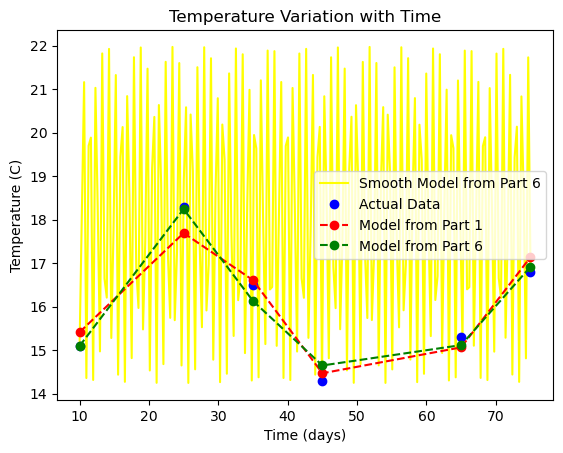

In [27]:
y_1 = min_model[0] * np.sin(min_model[2] * times) + min_model[1] * np.cos(min_model[2] * times) + min_model[3]
y = estimated_model[0] * np.sin(estimated_model[2] * times) + estimated_model[1] * np.cos(estimated_model[2] * times) + estimated_model[3]

time_smooth = np.linspace(times.min(), times.max(), 200)  # Creating a range of times to create a smoother curve
y_smooth = min_model[0] * np.sin(min_model[2] * time_smooth) + min_model[1] * np.cos(min_model[2] * time_smooth) + min_model[3]


plt.figure()
plt.plot(time_smooth, y_smooth,color = 'yellow', label = 'Smooth Model from Part 6')
plt.plot(times, d, 'o', color='blue', label='Actual Data')
plt.plot(times, y,'o', color='red', label='Model from Part 1',linestyle = '--')
plt.plot(times, y_1,'o', color='green', label='Model from Part 6', linestyle = '--')


plt.xlabel('Time (days)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Variation with Time')
plt.legend() 
plt.show()

* This value of k lies out of range of the uncertainty of the k value in the model from part 1 $(0.1110 \pm 0.0038)$. Therefore the model parameters from part 6 are completely different.
* The value of k from Part 6 is more defensible because it is based on 100 different random initial guesses, each of which was iterated 20 times. This approach explores a wider range of possible models and identifies the best-fitting one from many repetitions by minimising the RSS. In contrast, Part 1 used a single initial guess and only one set of iterations, which limits the robustness and reliability of the model. By considering a larger set of initial guesses, Part 6 provides a more thorough and optimized estimate of k.

I acknowledge the use of ChatGPT-4 (Open AI, https://chat.openai.com/) to breakdown and understand the questions.”